# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 22: Logarithmic Mean Risk Optimization (Kelly Criterion)

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2000-01-01'
end = '2019-12-31'

# Tickers of assets
assets = ['AIG', 'AKAM', 'AMT', 'APA', 'BA', 'BAX', 'BKNG',
          'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'MO', 'MSFT', 'NI',
          'NKTR', 'NTAP', 'PCAR', 'PSA', 'REGN', 'SBAC', 'SEE', 'T',
          'TGT', 'TMO', 'TTWO']

assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  26 of 26 completed


In [2]:
# Calculating returns

#Y = data[assets].pct_change().dropna()
Y = data[assets].copy()
Y = Y.resample('M').last().pct_change().dropna()
print(Y.shape)
display(Y.head())

(239, 26)


,AIG,AKAM,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,CNP,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-29,-15.2695%,4.8670%,37.2823%,0.0000%,-16.7100%,-14.6771%,-3.5560%,-13.5849%,-7.2463%,-8.3354%,...,88.0448%,4.6443%,-2.7548%,358.8832%,33.6082%,-11.4699%,-11.9534%,-10.2962%,-9.7473%,0.0000%
2000-03-31,23.8863%,-38.4450%,0.2538%,36.5170%,2.3688%,15.0229%,43.0168%,-0.2183%,3.1250%,14.5896%,...,-12.3179%,16.1103%,-3.8081%,-47.6770%,8.6420%,9.3082%,11.5894%,26.6949%,30.4000%,6.5327%
2000-04-30,0.1712%,-38.5154%,-5.6962%,-2.6383%,4.9587%,8.5878%,-20.9375%,-7.8650%,-5.4546%,12.9974%,...,-10.6496%,-4.8750%,6.5476%,-3.3827%,-7.6705%,2.4165%,4.7667%,-10.9532%,-4.9079%,-27.3585%
2000-05-31,2.6662%,-32.4905%,-20.2685%,25.6130%,-1.2138%,2.1114%,-39.7233%,5.0060%,-3.6859%,8.7704%,...,-12.6796%,-11.3612%,-0.2794%,-28.6652%,-8.3077%,0.6742%,-0.2853%,-5.6896%,-4.1936%,-5.8442%
2000-06-30,4.3865%,77.8792%,12.2896%,-3.3385%,7.0400%,5.7330%,-0.3689%,5.7888%,3.4942%,3.5011%,...,24.6854%,-5.2239%,6.1300%,46.3190%,39.4295%,-6.4733%,0.7153%,-7.4776%,13.4680%,33.7931%


## 2. Estimating Logarithmic Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Risk Adjusted Return.

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

port.solvers = ['MOSEK']
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w_1 = port.optimization(model=model, rm=rm, obj=obj, kelly=False, rf=rf, l=l, hist=hist)
w_2 = port.optimization(model=model, rm=rm, obj=obj, kelly='approx', rf=rf, l=l, hist=hist)
w_3 = port.optimization(model=model, rm=rm, obj=obj, kelly='exact', rf=rf, l=l, hist=hist)

w = pd.concat([w_1, w_2, w_3], axis=1)
w.columns = ['Arithmetic', 'Log Approx', 'Log Exact']

display(w)

,Arithmetic,Log Approx,Log Exact
AIG,0.0000%,0.0000%,0.0000%
AKAM,0.0000%,0.0000%,0.0000%
AMT,0.0000%,0.0000%,0.0000%
APA,0.0000%,0.0000%,0.0000%
BA,1.4589%,1.4586%,1.4465%
BAX,1.3212%,1.8359%,1.8364%
BKNG,2.6984%,2.5664%,2.5803%
BMY,0.0000%,0.0597%,0.1407%
CMCSA,0.0000%,0.0000%,0.0000%
CNP,0.0000%,0.0001%,0.0000%


<AxesSubplot:>

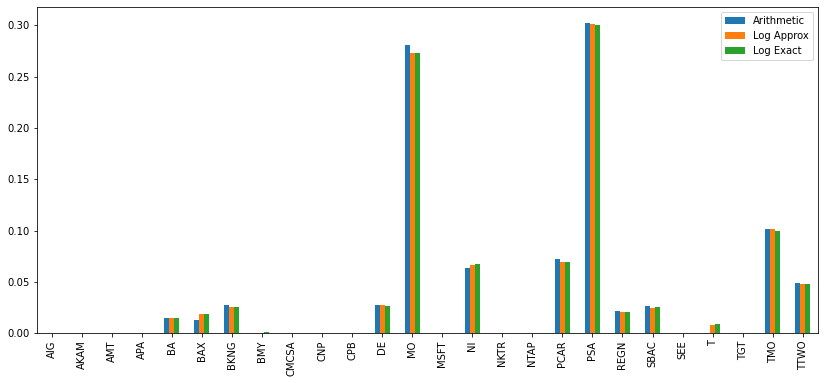

In [4]:
fig, ax = plt.subplots(figsize=(14,6))
w.plot(kind='bar', ax = ax)

In [5]:
returns = port.returns
cov = port.cov

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy()))
x = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Risk Adjusted Return:")
print("Arithmetic", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy()))
x = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Approx", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_3.to_numpy()))
x = rp.Sharpe_Risk(w_3, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Exact", (y/x).item() * 12**0.5)

Risk Adjusted Return:
Arithmetic 1.2708631210924424
Log Approx 1.2712397419739807
Log Exact 1.2712465781050932


### 2.2 Calculate efficient frontier

In [6]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, kelly="exact", points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AIG,AKAM,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,CNP,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
0,0.0000%,0.0000%,0.0000%,0.9497%,0.0000%,6.4552%,0.0000%,8.8793%,4.2373%,4.6782%,...,0.0000%,0.0469%,21.9202%,0.9367%,0.0000%,0.0000%,8.8801%,2.6682%,1.3191%,1.8953%
1,0.0000%,0.0000%,0.0000%,0.0000%,0.5034%,4.1813%,1.5452%,4.3751%,0.0000%,2.5077%,...,0.0000%,4.8895%,27.7197%,1.6074%,0.9938%,0.0000%,5.0664%,0.0154%,7.7434%,3.7995%
2,0.0000%,0.0000%,0.0000%,0.0000%,1.1276%,2.6421%,2.3361%,1.5717%,0.0000%,0.5769%,...,0.0000%,6.4586%,29.6415%,1.9030%,2.1597%,0.0000%,2.5290%,0.0000%,9.6799%,4.5687%
3,0.0000%,0.0000%,0.0000%,0.0000%,1.1700%,0.0000%,3.1115%,0.0000%,0.0000%,0.0000%,...,0.0000%,7.3733%,30.3571%,2.4815%,3.3565%,0.0000%,0.0000%,0.0000%,9.7306%,5.7699%
4,0.0000%,0.0000%,0.0000%,0.0000%,0.0296%,0.0000%,3.9898%,0.0000%,0.0000%,0.0000%,...,0.0000%,7.5012%,30.0468%,3.1727%,4.7569%,0.0000%,0.0000%,0.0000%,8.3958%,7.7188%


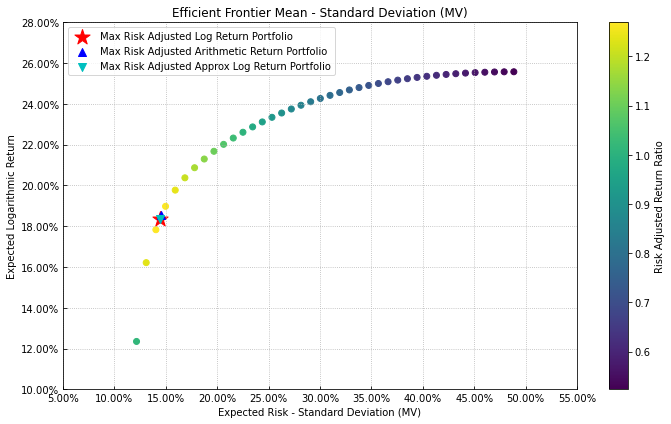

In [7]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Log Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

fig, ax = plt.subplots(figsize=(10,6))
rp.plot_frontier(w_frontier=frontier,
                 mu=mu,
                 cov=cov,
                 returns=returns,
                 rm=rm,
                 kelly=True,
                 rf=rf,
                 alpha=0.05,
                 cmap='viridis',
                 w=w_3,
                 label=label,
                 marker='*',
                 s=16,
                 c='r',
                 height=6,
                 width=10,
                 t_factor=12,
                 ax=ax)

y1 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy())) * 12 
x1 = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 12**0.5

y2 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy())) * 12 
x2 = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 12**0.5

ax.scatter(x=x1,
           y=y1,
           marker="^",
           s=8**2,
           c="b",
           label="Max Risk Adjusted Arithmetic Return Portfolio")
ax.scatter(x=x2,
           y=y2,
           marker="v",
           s=8**2,
           c="c",
           label="Max Risk Adjusted Approx Log Return Portfolio")
plt.legend()

## 2. Estimating Logarithmic Mean EVaR Portfolios

### 2.1 Calculating the portfolio that maximizes Risk Adjusted Return.

In [8]:
rm = 'EVaR' # Risk measure

w_1 = port.optimization(model=model, rm=rm, obj=obj, kelly=False, rf=rf, l=l, hist=hist)
w_2 = port.optimization(model=model, rm=rm, obj=obj, kelly='approx', rf=rf, l=l, hist=hist)
w_3 = port.optimization(model=model, rm=rm, obj=obj, kelly='exact', rf=rf, l=l, hist=hist)

w = pd.concat([w_1, w_2, w_3], axis=1)
w.columns = ['Arithmetic', 'Log Approx', 'Log Exact']

display(w)

,Arithmetic,Log Approx,Log Exact
AIG,0.0000%,0.0000%,0.0000%
AKAM,0.0000%,0.0000%,0.0000%
AMT,0.0000%,0.0000%,0.0000%
APA,6.6740%,3.2111%,3.5746%
BA,0.0000%,0.0000%,0.0000%
BAX,6.0638%,2.5271%,2.6328%
BKNG,6.9308%,5.1606%,5.3196%
BMY,4.7594%,6.8591%,6.9081%
CMCSA,0.0000%,0.0000%,0.0000%
CNP,0.0000%,2.3999%,2.2606%


<AxesSubplot:>

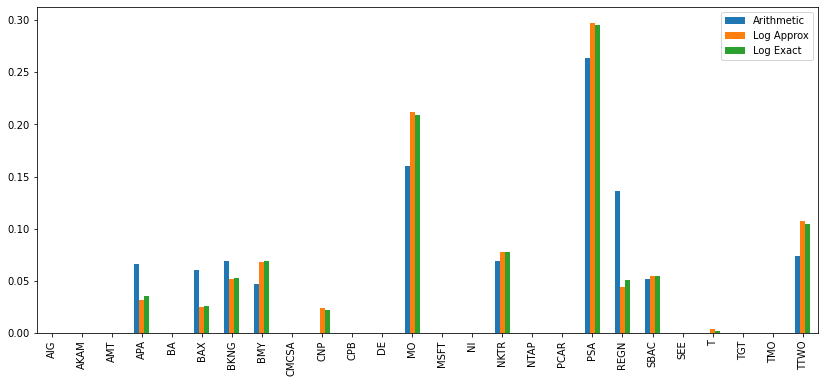

In [9]:
fig, ax = plt.subplots(figsize=(14,6))
w.plot(kind='bar', ax = ax)

In [10]:
returns = port.returns
cov = port.cov

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy()))
x = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Risk Adjusted Return:")
print("Arithmetic", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy()))
x = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Approx", (y/x).item() * 12**0.5)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_3.to_numpy()))
x = rp.Sharpe_Risk(w_3, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Exact", (y/x).item() * 12**0.5)

Risk Adjusted Return:
Arithmetic 0.6328345241128857
Log Approx 0.645853935415245
Log Exact 0.6459339768016784


### 3.2 Calculate efficient frontier

In [11]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, kelly="exact", points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AIG,AKAM,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,CNP,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,2.8293%,2.3021%,18.2682%,0.0000%,1.9354%,...,0.0000%,0.0000%,17.2214%,0.0000%,5.2722%,0.0000%,6.7943%,0.0000%,7.5230%,8.0869%
1,0.0000%,0.0000%,0.0000%,3.4832%,0.0000%,3.9411%,3.1868%,11.6400%,0.0000%,3.6459%,...,0.0000%,0.0000%,25.2858%,0.0000%,7.1268%,0.0000%,4.4858%,0.0000%,0.0000%,11.6264%
2,0.0000%,0.0000%,0.0000%,4.3953%,0.0000%,3.0234%,3.8072%,10.2550%,0.0000%,3.3127%,...,0.0000%,0.0000%,27.4594%,1.2358%,6.6436%,0.0000%,1.9048%,0.0000%,0.0000%,11.3907%
3,0.0000%,0.0000%,0.0000%,4.0924%,0.0000%,3.0385%,4.7244%,8.0627%,0.0000%,2.6206%,...,0.0000%,0.0000%,28.5343%,3.7233%,5.8076%,0.0000%,0.9777%,0.0000%,0.0000%,10.7467%
4,0.0000%,0.0000%,0.0000%,3.2559%,0.0000%,2.4338%,5.5133%,6.3207%,0.0000%,2.1010%,...,0.0000%,0.0000%,29.9199%,5.5798%,5.3796%,0.0000%,0.0000%,0.0000%,0.0000%,10.3803%


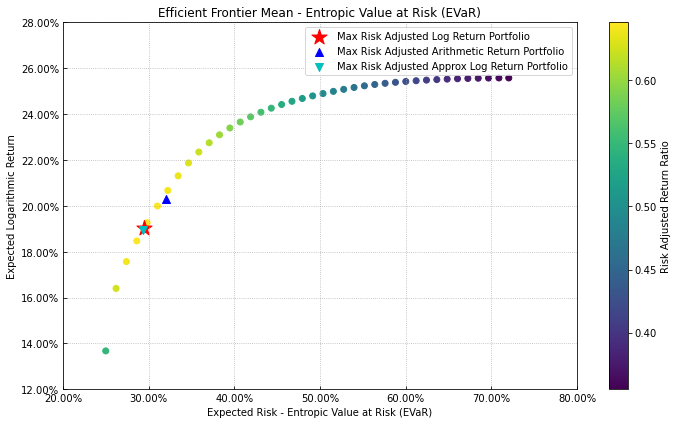

In [12]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Log Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

fig, ax = plt.subplots(figsize=(10,6))
rp.plot_frontier(w_frontier=frontier,
                 mu=mu,
                 cov=cov,
                 returns=returns,
                 rm=rm,
                 kelly=True,
                 rf=rf,
                 alpha=0.05,
                 cmap='viridis',
                 w=w_3,
                 label=label,
                 marker='*',
                 s=16,
                 c='r',
                 height=6,
                 width=10,
                 t_factor=12,
                 ax=ax)

y1 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy())) * 12
x1 = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 12**0.5

y2 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy())) * 12
x2 = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05) * 12**0.5

ax.scatter(x=x1,
           y=y1,
           marker="^",
           s=8**2,
           c="b",
           label="Max Risk Adjusted Arithmetic Return Portfolio")
ax.scatter(x=x2,
           y=y2,
           marker="v",
           s=8**2,
           c="c",
           label="Max Risk Adjusted Approx Log Return Portfolio")
plt.legend()

## 3. Estimating Logarithmic Mean EDaR Portfolios

### 3.1 Calculating the portfolio that maximizes Risk Adjusted Return.

In [13]:
rm = 'EDaR' # Risk measure

w_1 = port.optimization(model=model, rm=rm, obj=obj, kelly=False, rf=rf, l=l, hist=hist)
w_2 = port.optimization(model=model, rm=rm, obj=obj, kelly='approx', rf=rf, l=l, hist=hist)
w_3 = port.optimization(model=model, rm=rm, obj=obj, kelly='exact', rf=rf, l=l, hist=hist)

w = pd.concat([w_1, w_2, w_3], axis=1)
w.columns = ['Arithmetic', 'Log Approx', 'Log Exact']

display(w)

,Arithmetic,Log Approx,Log Exact
AIG,0.0000%,0.0000%,0.0000%
AKAM,0.0000%,0.0000%,0.0000%
AMT,2.8670%,0.3727%,0.5224%
APA,0.0000%,0.0000%,0.0000%
BA,0.0000%,0.0000%,0.0000%
BAX,0.0000%,0.0000%,0.0000%
BKNG,3.0492%,1.4551%,1.6956%
BMY,0.0000%,0.0000%,0.0000%
CMCSA,0.0000%,0.0000%,0.0000%
CNP,0.0000%,0.0000%,0.0000%


<AxesSubplot:>

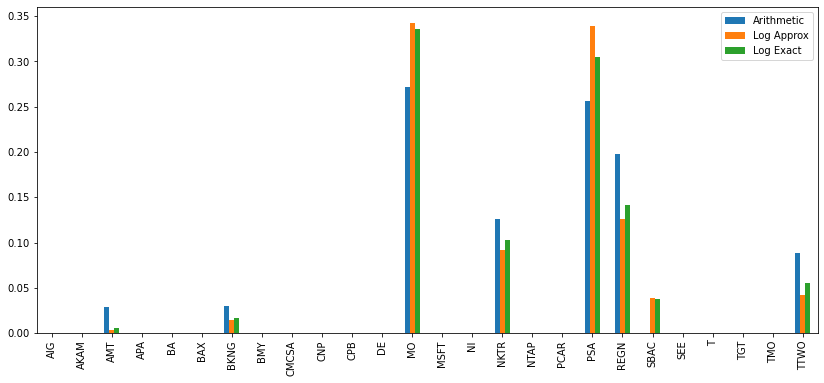

In [14]:
fig, ax = plt.subplots(figsize=(14,6))
w.plot(kind='bar', ax = ax)

In [15]:
returns = port.returns
cov = port.cov

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy()))
x = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Risk Adjusted Return:")
print("Arithmetic", (y/x).item() * 12)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy()))
x = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Approx", (y/x).item() * 12)

y = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_3.to_numpy()))
x = rp.Sharpe_Risk(w_3, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)
print("Log Exact", (y/x).item() * 12)

Risk Adjusted Return:
Arithmetic 0.8286219613071538
Log Approx 0.8435798738462544
Log Exact 0.8449873687053613


### 3.2 Calculate efficient frontier

In [16]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, kelly="exact", points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AIG,AKAM,AMT,APA,BA,BAX,BKNG,BMY,CMCSA,CNP,...,NTAP,PCAR,PSA,REGN,SBAC,SEE,T,TGT,TMO,TTWO
0,0.0000%,0.0000%,1.9618%,5.5780%,0.0000%,0.0000%,1.9596%,2.3327%,0.0000%,0.0000%,...,0.0000%,0.0000%,23.2489%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
1,0.0000%,0.0000%,2.5703%,3.6696%,0.0000%,0.0000%,0.9192%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,31.4908%,5.8684%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
2,0.0000%,0.0000%,3.2751%,1.2159%,0.0000%,0.0000%,0.3203%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,36.5053%,8.0955%,0.4379%,0.0000%,0.0000%,0.0000%,0.0000%,0.7603%
3,0.0000%,0.0000%,1.6927%,0.0000%,0.0000%,0.0000%,1.2423%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,34.9685%,12.1344%,2.4517%,0.0000%,0.0000%,0.0000%,0.0000%,3.5029%
4,0.0000%,0.0000%,0.8850%,0.0000%,0.0000%,0.0000%,1.8558%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,27.4040%,15.3669%,3.4524%,0.0000%,0.0000%,0.0000%,0.0000%,6.5588%


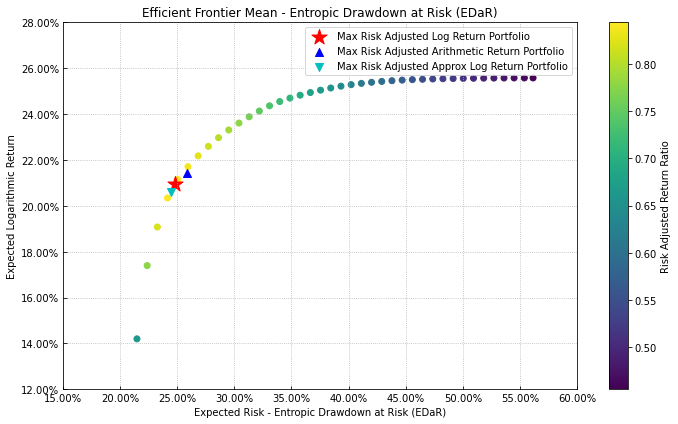

In [17]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Log Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

fig, ax = plt.subplots(figsize=(10,6))
rp.plot_frontier(w_frontier=frontier,
                 mu=mu,
                 cov=cov,
                 returns=returns,
                 rm=rm,
                 kelly=True,
                 rf=rf,
                 alpha=0.05,
                 cmap='viridis',
                 w=w_3,
                 label=label,
                 marker='*',
                 s=16,
                 c='r',
                 height=6,
                 width=10,
                 t_factor=12,
                 ax=ax)

y1 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_1.to_numpy())) * 12
x1 = rp.Sharpe_Risk(w_1, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)

y2 = 1/(returns.shape[0]) * np.sum(np.log(1 + returns @ w_2.to_numpy())) * 12
x2 = rp.Sharpe_Risk(w_2, cov=cov, returns=returns, rm=rm, rf=rf, alpha=0.05)

ax.scatter(x=x1,
           y=y1,
           marker="^",
           s=8**2,
           c="b",
           label="Max Risk Adjusted Arithmetic Return Portfolio")
ax.scatter(x=x2,
           y=y2,
           marker="v",
           s=8**2,
           c="c",
           label="Max Risk Adjusted Approx Log Return Portfolio")
plt.legend()